## Test ERA5 data during P-3 cloud modules

Testing output of ```era5_cldmodregions.py```.

Verification that data in correct region is isolated and that simple thermodynamic profiles are reasonable.

In [17]:
import os

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
path_era5dir = "./cldmod_datafiles/"
path_p3insitu = "./cldmod_datafiles/"

In [19]:
fnames_p3insitu = [f for f in os.listdir(path_p3insitu) 
                   if '_insitu+remote_' in f]

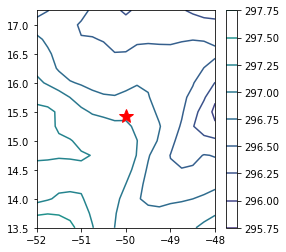

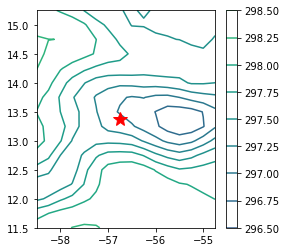

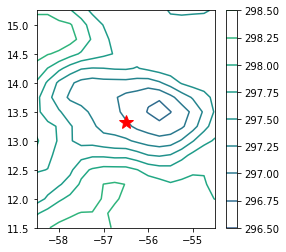

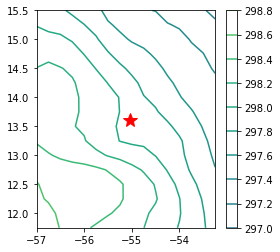

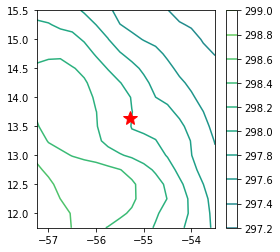

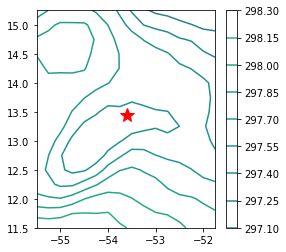

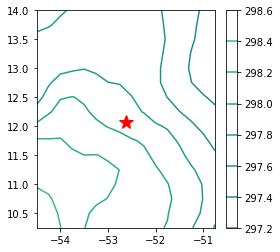

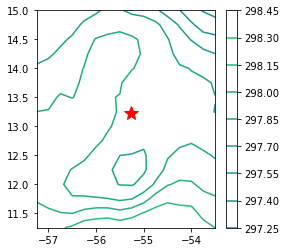

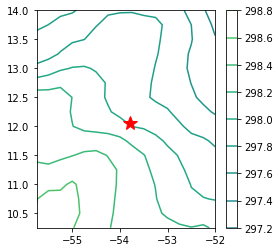

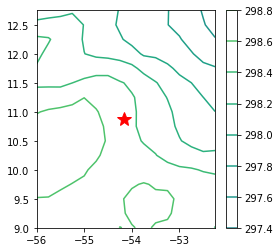

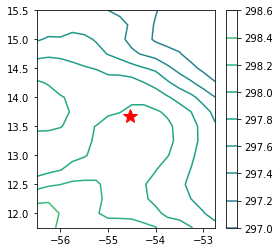

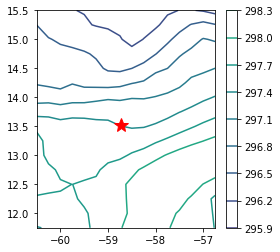

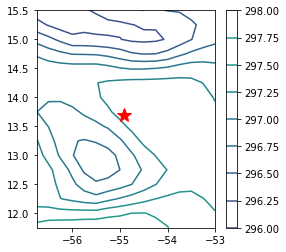

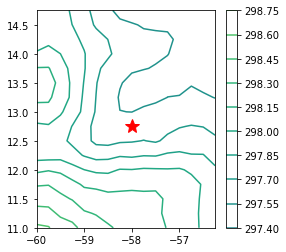

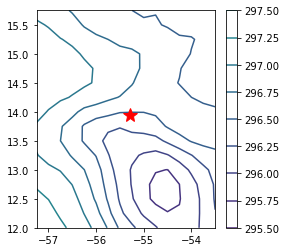

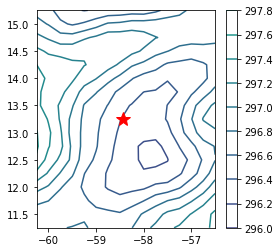

In [28]:
ncld_list = [str(i).zfill(2) for i in np.arange(1, 17, 1)]

for ncld in ncld_list:
    
    # Load data:
    fname_era5 = "p3cld_ECMWF_ERA5_plevs_hourly_ncld%s.nc" % ncld
    era5 = xr.load_dataset(path_era5dir + fname_era5)
    
    fname_p3 = [f for f in fnames_p3insitu if "ncld%s" % ncld in f][0]
    p3 = xr.load_dataset(path_p3insitu + fname_p3)
    
    # Contour plot of near surface temperature from ERA5:
    plt.figure(figsize=(4,4))
    era5_sfc = era5.mean(dim='time').sel(level=1000, method='nearest')
    plt.contour(
        era5_sfc['longitude'], era5_sfc['latitude'], 
        era5_sfc['t'], vmin=295, vmax=300
        )
    plt.colorbar()
    
    # Mark mean P-3 location during cloud module:
    p3mean = p3.mean(dim='time')
    plt.plot(p3mean['lon'], p3mean['lat'], 'r*', markersize=15)
    
    

In [21]:
fnames_p3insitu

['p3cld_insitu+remote_20200117_ncld01.nc',
 'p3cld_insitu+remote_20200124_ncld02.nc',
 'p3cld_insitu+remote_20200124_ncld03.nc',
 'p3cld_insitu+remote_20200131_ncld04.nc',
 'p3cld_insitu+remote_20200131_ncld05.nc',
 'p3cld_insitu+remote_20200204_ncld06.nc',
 'p3cld_insitu+remote_20200204_ncld07.nc',
 'p3cld_insitu+remote_20200204_ncld08.nc',
 'p3cld_insitu+remote_20200205_ncld09.nc',
 'p3cld_insitu+remote_20200205_ncld10.nc',
 'p3cld_insitu+remote_20200205_ncld11.nc',
 'p3cld_insitu+remote_20200209_ncld12.nc',
 'p3cld_insitu+remote_20200209_ncld13.nc',
 'p3cld_insitu+remote_20200210_ncld14.nc',
 'p3cld_insitu+remote_20200210_ncld15.nc',
 'p3cld_insitu+remote_20200211_ncld16.nc']

In [25]:
p3

<xarray.Dataset>
Dimensions:     (time: 5041)
Coordinates:
  * time        (time) datetime64[ns] 2020-02-11T03:36:00 ... 2020-02-11T05:0...
Data variables:
    mr          (time) float32 13.25 13.23 13.1 13.08 ... 6.391 6.357 6.429
    dD          (time) float32 -69.21 -70.5 -69.79 ... -112.1 -112.2 -111.5
    rh          (time) float32 70.3 70.13 69.67 69.55 ... 71.3 71.32 70.41 70.75
    lat         (time) float32 13.14 13.14 13.14 13.14 ... 13.26 13.26 13.26
    lon         (time) float32 -58.82 -58.82 -58.82 ... -58.91 -58.92 -58.92
    alt         (time) float32 298.1 298.1 296.6 ... 3.222e+03 3.223e+03
    Ta          (time) float32 296.7 296.7 296.7 296.7 ... 280.0 280.1 280.2
    press       (time) float32 983.9 983.4 983.9 984.5 ... 696.5 696.4 696.3
    wvel        (time) float32 -12.74 -13.11 -12.89 ... -11.87 -12.26 -12.75
    RH          (time) float32 71.13 71.8 71.44 70.68 ... 74.14 73.47 68.28
    alt_CT      (time) float32 nan nan nan nan nan ... 3.118 3.118 3.118 3.149
    SST_IR_est  (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    levlegflag  (time) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 5.0 5.0 5.0 5.0 5.0
Attributes:
    cloud_type: